In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tikzplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.2 MB/s eta 0:00:00


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tikzplotlib

In [7]:
df = pd.read_csv("/content/drive/MyDrive/data/generator_training_data.csv")

df['date'] = pd.to_datetime(df['date'])

In [8]:
df.head()

,hotel_url,date,rating,title,text
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,2019-01-01,5.0,Xmas holiday,We went here with our kids for Xmas holiday an...
1,Hotel_Review-g644280-d1821178-Reviews-Agrituri...,2018-10-01,5.0,Great time in a lovely location,I had a wonderful time for a couple of nights....
2,Hotel_Review-g644280-d1821178-Reviews-Agrituri...,2015-03-01,3.0,Chilly on a winter's night,"When traveling to Tuscany in winter, please kn..."
3,Hotel_Review-g312848-d4173038-Reviews-Villa_Hu...,2018-10-01,5.0,Highly recommended,The hotel is new and very neat. Comfortable ro...
4,Hotel_Review-g312848-d4173038-Reviews-Villa_Hu...,2016-02-01,3.0,Quiet and modern,The hotel consists of three sites located on a...


In [ ]:
df['date'].dt.year.value_counts().sort_index()

2001         7
2002       268
2003      1966
2004      5038
2005      8812
2006     13534
2007     20016
2008     26270
2009     42401
2010     61201
2011    103649
2012    167257
2013    233210
2014    281748
2015    349193
2016    402769
2017    372483
2018    318983
2019     91195
Name: date, dtype: int64

The tikzplotlib can be used to export plots to the .tex format. This is used for easier workflow implementing these plots into the final paper.

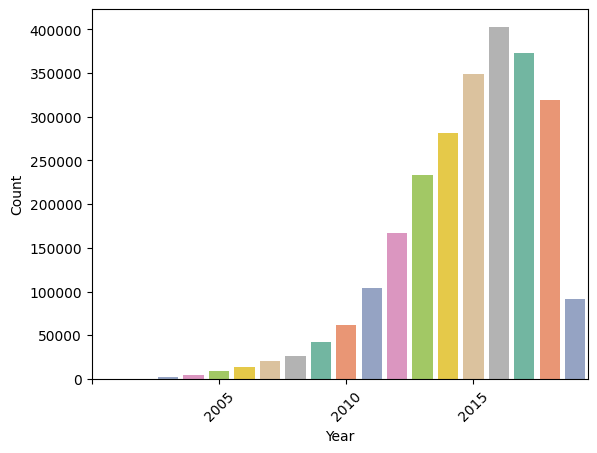

In [18]:
plt.figure()
ax = sns.countplot(data=df, x=df['date'].dt.year, palette='Set2')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xticks([tick - 1 for tick in ax.get_xticks() if tick % 5 == 0])
plt.xticks(rotation=45)
#plt.show()
tikzplotlib.save("/content/drive/MyDrive/tex_files/year_dist.tex")

Seeing the distribution of ratings:

In [ ]:
df['rating'].value_counts().sort_index()

1.0     125310
2.0     125885
3.0     280721
4.0     668038
5.0    1300046
Name: rating, dtype: int64

Visualisation:

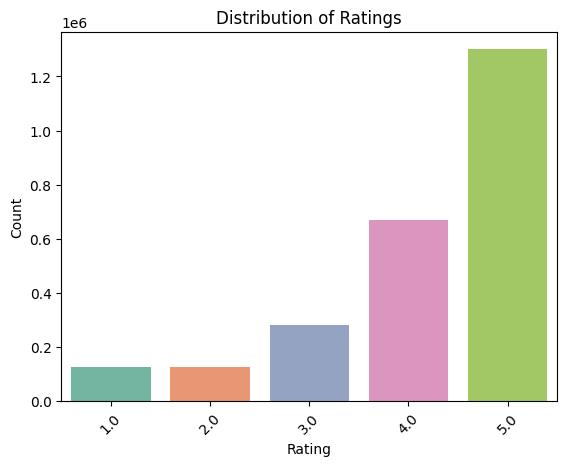

In [ ]:
plt.figure()
sns.countplot(data=df, x=df['rating'], palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [1]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['text'].str.len(), bins=50, color=sns.color_palette("pastel")[0], binrange=(0, 2500))
plt.xlabel("Review Length")
plt.ylabel("Frequency")
tikzplotlib.save("/content/drive/MyDrive/tex_files/review_length_dist.tex")
#plt.show()

NameError: ignored